In [21]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [22]:
year = 2024 #GP year
gp = 'Baku' # GP name
event = 'Q' # Q for qualifying, FP1 for free practice 1, R for race

In [23]:
# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
#fastf1.Cache.enable_cache('\cache')
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)

In [24]:
# Get qualification session
session = fastf1.get_session(year, gp, event)
session.load()
laps = session.laps
#laps.dropna(subset=['Driver'], inplace = True)
box_laps = laps.pick_box_laps()
laps = laps.pick_accurate()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.3.0]
req            INFO 	Updating cache for session_info...
_api           INFO 	Fetching session info data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!


req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req            INFO 	Updating cache for car_data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for position_data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data..

In [25]:
# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

['LEC' 'PIA' 'SAI' 'PER' 'RUS' 'VER' 'HAM' 'ALO' 'COL' 'ALB' 'BEA' 'TSU'
 'HUL' 'STR' 'RIC' 'NOR' 'BOT' 'ZHO' 'OCO' 'GAS']


In [26]:
# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

In [27]:
# Get all team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

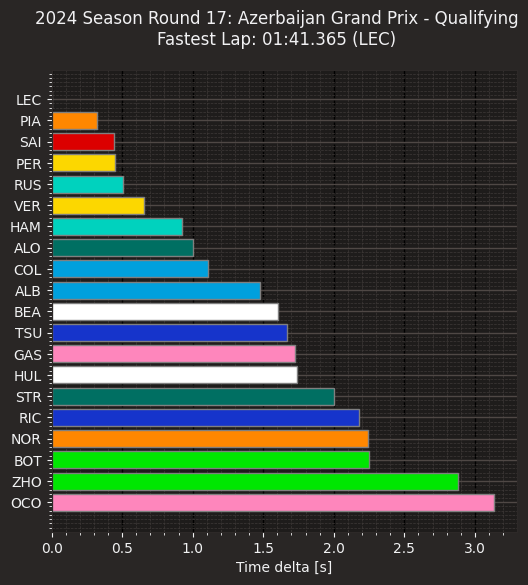

In [28]:
# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session}\n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()